# Run Regressions

## Imports

In [ ]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from settings import config
from pathlib import Path
import regressions
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

# Load environment variables
DATA_DIR = Path(config("DATA_DIR"))
OUTPUT_DIR = Path(config("OUTPUT_DIR"))
WRDS_USERNAME = config("WRDS_USERNAME")
START_DATE = config("START_DATE")
END_DATE = config("END_DATE")

# Run Regressions for B/M ratios

### 6 Portfolios
#### Monthly Regressions


Processing 6-Portfolios Data
Aligned data from 1930-02-01 to 2023-06-01
Number of dates: 1121
Date range: 1930-02-01 to 1980-01-01
Number of dates: 600
Date range: 1930-02-01 to 1980-01-01
Number of dates: 600
First-Stage Estimated Loadings (phi_i):
SMALL LoBM: -0.4221
ME1 BM2: -0.5695
SMALL HiBM: -0.6396
BIG LoBM: -0.1332
ME2 BM2: -0.4022
BIG HiBM: -0.3220
First stage completed.

Estimated Latent Factor (F_t) Sample:
1930-02-01   -3.236107
1930-03-01   -3.229954
1930-04-01   -3.251920
1930-05-01   -3.236370
1930-06-01   -3.251362
dtype: float64
Second stage completed.

Third-Stage Regression Summary:
                              OLS Regression Results                             
Dep. Variable:     value_weighted_return   R-squared:                       0.009
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     5.200
Date:                   Sun, 16 Mar 2025   Prob (F-statistic):

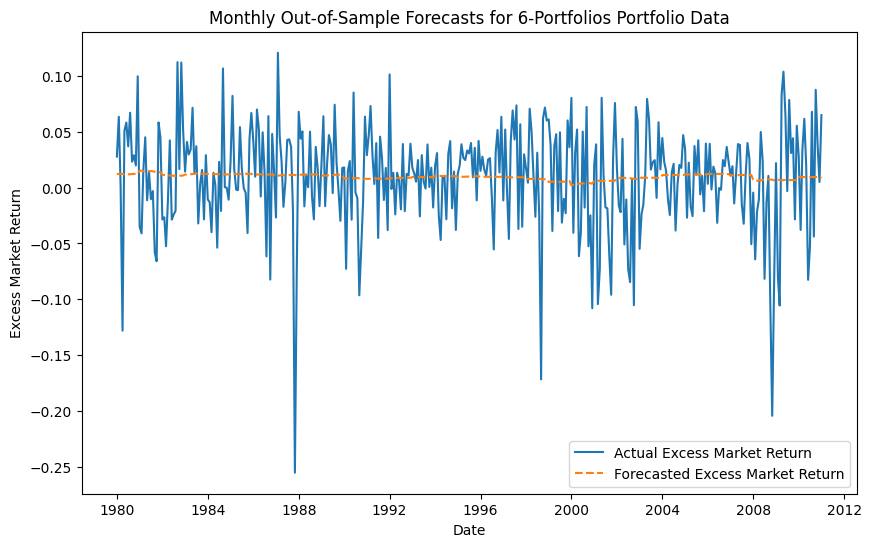

,R2 In-Sample,R2 Out-of-Sample
6-Portfolios,0.008635,0.00377


In [9]:
def regress():
    portfolio_datasets = {
        "6-Portfolios": "6_Portfolios_2x3"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\nProcessing {label} Data")
        in_sample = regressions.run_in_sample_pls(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            end_date='1980-01-01')
        recursive = regressions.run_recursive_forecast(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            start_train_date='1930-01-01', 
            end_train_date='1980-01-01',
            end_forecast_date='2011-01-01')
        regressions.display_results(label, in_sample, recursive)

        results[label] = {
            "R2 In-Sample": in_sample["third_model"].rsquared,  
            "R2 Out-of-Sample": recursive["R2_oos"]
        }

    return results

# Run function and extract summary DataFrame
results = regress()
summary_df_6_monthly = pd.DataFrame(results).T 

# Display the DataFrame
summary_df_6_monthly

In [11]:
# Define the directory and file path
summary_tex_dir = "../reports/tables"
summary_tex_path = os.path.join(summary_tex_dir, "summary_table_6_monthly.tex")

# Ensure the directory exists
os.makedirs(summary_tex_dir, exist_ok=True)

# Export to LaTeX
summary_df_6_monthly.to_latex(summary_tex_path, index=True, float_format="%.6f")

### 6 Portfolios
#### Annual Regressions

In [ ]:
def regress_annual():
    portfolio_datasets = {
        "6-Portfolios": "6_Portfolios_2x3"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\n[Annual] Processing {label} Data")
        in_sample_results = regressions.run_in_sample_pls_annual(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            end_date='1980-01-01'
        )
        forecast_series, actual_series, R2_oos = regressions.run_recursive_forecast_annual(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            start_train_year=1930,
            end_train_year=1980,
            end_forecast_year=2010,
            n_components=1
        )
        regressions.display_results_annual(label, in_sample_results, forecast_series, actual_series, R2_oos)

        results[label] = {
            "R2 In-Sample": in_sample_results["third_model"].rsquared,  
            "R2 Out-of-Sample": R2_oos
        }
    
    return results

# Run function and extract summary DataFrame
results_annual = regress_annual()
summary_df_6_annual = pd.DataFrame(results_annual).T

# Display the DataFrame
summary_df_6_annual


In [ ]:
# Define the directory and file path
summary_tex_dir = "../reports/tables"
summary_tex_path = os.path.join(summary_tex_dir, "summary_table_6_annual.tex")

# Ensure the directory exists
os.makedirs(summary_tex_dir, exist_ok=True)

# Export to LaTeX
summary_df_6_annual.to_latex(summary_tex_path, index=True, float_format="%.6f")

### 25 Portfolios
#### Monthly Regressions

In [ ]:
def regress():
    portfolio_datasets = {
        "25-Portfolios": "25_Portfolios_5x5"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\nProcessing {label} Data")
        in_sample = regressions.run_in_sample_pls(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            end_date='1980-01-01')
        recursive = regressions.run_recursive_forecast(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            start_train_date='1930-01-01', 
            end_train_date='1980-01-01',
            end_forecast_date='2011-01-01')
        regressions.display_results(label, in_sample, recursive)

        results[label] = {
            "R2 In-Sample": in_sample["third_model"].rsquared,  
            "R2 Out-of-Sample": recursive["R2_oos"]
        }

    return results

# Run function and extract summary DataFrame
results = regress()
summary_df_25_monthly = pd.DataFrame(results).T 

# Display the DataFrame
summary_df_25_monthly

In [ ]:
# Define the directory and file path
summary_tex_dir = "../reports/tables"
summary_tex_path = os.path.join(summary_tex_dir, "summary_table_25_monthly.tex")

# Ensure the directory exists
os.makedirs(summary_tex_dir, exist_ok=True)

# Export to LaTeX
summary_df_25_monthly.to_latex(summary_tex_path, index=True, float_format="%.6f")

### 25 Portfolios
#### Annual Regressions

In [ ]:
def regress_annual():
    portfolio_datasets = {
        "25-Portfolios": "25_Portfolios_5x5"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\n[Annual] Processing {label} Data")
        in_sample_results = regressions.run_in_sample_pls_annual(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            end_date='1980-01-01'
        )
        forecast_series, actual_series, R2_oos = regressions.run_recursive_forecast_annual(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            start_train_year=1930,
            end_train_year=1980,
            end_forecast_year=2010,
            n_components=1
        )
        regressions.display_results_annual(label, in_sample_results, forecast_series, actual_series, R2_oos)

        results[label] = {
            "R2 In-Sample": in_sample_results["third_model"].rsquared,  
            "R2 Out-of-Sample": R2_oos
        }
    
    return results

# Run function and extract summary DataFrame
results_annual = regress_annual()
summary_df_25_annual = pd.DataFrame(results_annual).T

# Display the DataFrame
summary_df_25_annual

In [ ]:
# Define the directory and file path
summary_tex_dir = "../reports/tables"
summary_tex_path = os.path.join(summary_tex_dir, "summary_table_25_annual.tex")

# Ensure the directory exists
os.makedirs(summary_tex_dir, exist_ok=True)

# Export to LaTeX
summary_df_25_annual.to_latex(summary_tex_path, index=True, float_format="%.6f")

### 100 Portfolios
#### Monthly Regressions

In [ ]:
def regress():
    portfolio_datasets = {
        "100-Portfolios": "100_Portfolios_10x10"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\nProcessing {label} Data")
        in_sample = regressions.run_in_sample_pls(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            end_date='1980-01-01')
        recursive = regressions.run_recursive_forecast(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            start_train_date='1930-01-01', 
            end_train_date='1980-01-01',
            end_forecast_date='2011-01-01')
        regressions.display_results(label, in_sample, recursive)

        results[label] = {
            "R2 In-Sample": in_sample["third_model"].rsquared,  
            "R2 Out-of-Sample": recursive["R2_oos"]
        }

    return results

# Run function and extract summary DataFrame
results = regress()
summary_df_100_monthly = pd.DataFrame(results).T 

# Display the DataFrame
summary_df_100_monthly

In [ ]:
# Define the directory and file path
summary_tex_dir = "../reports/tables"
summary_tex_path = os.path.join(summary_tex_dir, "summary_table_100_monthly.tex")

# Ensure the directory exists
os.makedirs(summary_tex_dir, exist_ok=True)

# Export to LaTeX
summary_df_100_monthly.to_latex(summary_tex_path, index=True, float_format="%.6f")

### 100 Portfolios
#### Annual Regressions

In [ ]:
def regress_annual():
    portfolio_datasets = {
        "100-Portfolios": "100_Portfolios_10x10"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\n[Annual] Processing {label} Data")
        in_sample_results = regressions.run_in_sample_pls_annual(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            end_date='1980-01-01'
        )
        forecast_series, actual_series, R2_oos = regressions.run_recursive_forecast_annual(
            dataset_name=dataset_name,
            weighting="BE_FYt-1_to_ME_June_t",
            h=1,
            start_train_year=1930,
            end_train_year=1980,
            end_forecast_year=2010,
            n_components=1
        )
        regressions.display_results_annual(label, in_sample_results, forecast_series, actual_series, R2_oos)

        results[label] = {
            "R2 In-Sample": in_sample_results["third_model"].rsquared,  
            "R2 Out-of-Sample": R2_oos
        }
    
    return results

# Run function and extract summary DataFrame
results_annual = regress_annual()
summary_df_100_annual = pd.DataFrame(results_annual).T

# Display the DataFrame
summary_df_100_annual

In [ ]:
# Define the directory and file path
summary_tex_dir = "../reports/tables"
summary_tex_path = os.path.join(summary_tex_dir, "summary_table_100_annual.tex")

# Ensure the directory exists
os.makedirs(summary_tex_dir, exist_ok=True)

# Export to LaTeX
summary_df_100_annual.to_latex(summary_tex_path, index=True, float_format="%.6f")